In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [36]:
w2=np.array([[-0.6833, -0.79001 ],
[ 2.2394, -1.9829 ]])
b2=np.array([[ 7.9758 ],
[-1.1627 ]])
w3=np.array([[ 1.5018, -3.9478 ],
[ 6.8604, -0.10918 ],
[ 3.5428, -3.2658 ]])
b3=np.array([[-1.2487 ],
[ 0.55873 ],
[ 2.8432 ]])
w4=np.array([[ 15.212, 14.739, -1.8834 ],
[-9.6023, -8.7817, -9.6393 ],
[-14.059, 7.8012, 4.4174 ],
[ 6.1827, -14.169, 6.0915 ]])
b4=np.array([[-1.3401 ],
[ 3.1183 ],
[-1.0419 ],
[-1.0423 ]])

def tansig(x):
    return 2/(1+np.exp(-2.0*x))-1
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x[:]))


def softmax_prime(x):
    return np.diag(softmax(x[:,0])) -  softmax(x)*softmax(x.T)

def tansig_prime(x):
    return (4* np.exp(-2.0 * x))/((1 + np.exp(-2.0 * x))**2)



## Initial Classification of the input

x = np.array([[4], [5]])
z2 = w2 @ x + b2
a2 = tansig(z2)
z3 = w3 @ a2 + b3
a3 = tansig(z3)
z4 = w4 @ a3 + b4
a4 = softmax(z4)
print("Initial Classification : "); print(a4)
y = np.array([[1], [0], [0], [0]])
print('Initial Label :'); print(y)
de = 0.3
## Adding Perturbation to the weights and re-classifying
w2=w2+de; b2=b2+de; w3=w3+de;b3=b3+de
z21 = w2 @ x + b2
a21 = tansig(z21)
z31 = w3 @ a21 + b3
a31 = tansig(z31)
z41 = w4 @ a31 + b4
a41 = softmax(z41)
out = a41.copy()
print("Reclassification after perturbation to the weights :"); print(out)


cost=0.5*np.sum((out-y)**2)
dcost= (out - y)

print("cost=");print(cost)
print("dcost=");print(dcost)


    
## ----------------
## backpropagation:
## ----------------
delta4 = softmax_prime(z41)@ dcost
nabla_b4 = delta4
nabla_w4 = delta4@a31.T
print("nabla_w4 = "); print(nabla_w4); print("nabla_b4 = "); print(nabla_b4)


delta3 = tansig_prime(z31)*(w4.T@delta4)
nabla_b3 = delta3
nabla_w3 = delta3@a21.T
print("nabla_w3 = "); print(nabla_w3); print("nabla_b3 = "); print(nabla_b3)


delta2 = tansig_prime(z21)*(w3.T@delta3)
nabla_b2 = delta2
nabla_w2 = delta2@x.T
print("nabla_w2 = "); print(nabla_w2); print("nabla_b2 = "); print(nabla_b2)


eta = 7 * 10**8
w2=w2-eta*nabla_w2; b2=b2-eta*nabla_b2
w3=w3-eta*nabla_w3; b3=b3-eta*nabla_b3
w4=w4-eta*nabla_w4; b4=b4-eta*nabla_b4

z22 = w2 @ x + b2
a22 = tansig(z22)
z32 = w3 @ a22 + b3
a32 = tansig(z32)
z42 = w4 @ a32 + b4
a42 = softmax(z42)
y1= a42.copy()
print("Prediction after Backpropagation: "); print(y1)
cost1 = 0.5*np.sum((y1-y)**2)
print("Cost after Steepest descent :"); print(cost1)


Initial Classification : 
[[1.00000000e+00]
 [3.85082200e-23]
 [1.41748367e-13]
 [1.31896618e-13]]
Initial Label :
[[1]
 [0]
 [0]
 [0]]
Reclassification after perturbation to the weights :
[[1.64900989e-12]
 [4.83483608e-14]
 [1.00000000e+00]
 [8.61356174e-18]]
cost=
0.9999999999966536
dcost=
[[-1.00000000e+00]
 [ 4.83483608e-14]
 [ 1.00000000e+00]
 [ 8.61356174e-18]]
nabla_w4 = 
[[ 3.09513814e-12 -3.29801922e-12 -3.29764580e-12]
 [ 4.53741535e-14 -4.83483527e-14 -4.83428784e-14]
 [-3.14057023e-12  3.34642931e-12  3.34605041e-12]
 [ 8.08368817e-18 -8.61356030e-18 -8.61258502e-18]]
nabla_b4 = 
[[-3.29801977e-12]
 [-4.83483608e-14]
 [ 3.34642987e-12]
 [-8.61356174e-18]]
nabla_w3 = 
[[-1.15332733e-11 -8.15268395e-12]
 [-7.34087937e-18 -5.18914866e-18]
 [ 4.86472564e-15  3.43879572e-15]]
nabla_b3 = 
[[-1.15375845e-11]
 [-7.34362346e-18]
 [ 4.86654412e-15]]
nabla_w2 = 
[[-6.20765883e-14 -7.75957354e-14]
 [ 8.42606276e-11  1.05325785e-10]]
nabla_b2 = 
[[-1.55191471e-14]
 [ 2.10651569e-11]]
P

In [41]:
########################################################################
def calc_gini(X,y,iattribute):
########################################################################

    y_set_a=y[:,X[iattribute,:]==1]
    y_set_b=y[:,X[iattribute,:]==0]
    # number of data points in set:
    N=np.sum(y[:])
    # number of data points in each (a,b) group:
    N_a=np.sum(y_set_a[:])
    N_b=np.sum(y_set_b[:])
    # probability of yes/no recommendation for group a:
    p_a1=np.sum(y_set_a[0,:])/np.sum(y_set_a[:])
    p_a2=np.sum(y_set_a[1,:])/np.sum(y_set_a[:])
    # probability of yes/no recommendation for group b:
    p_b1=np.sum(y_set_b[0,:])/np.sum(y_set_b[:])
    p_b2=np.sum(y_set_b[1,:])/np.sum(y_set_b[:])
    
    # Gini index:
    print("calculating the Gini index: p_a1=%g,p_a2=%g,p_b1=%g,p_b2=%g,N_a=%d,N_b=%d,N=%d\n" \
          % (p_a1,p_a2,p_b1,p_b2,N_a,N_b,N) )
    gini=(N_a/N)*(p_a1*(1-p_a1)+p_a2*(1-p_a2)) \
        +(N_b/N)*(p_b1*(1-p_b1)+p_b2*(1-p_b2))
    
    return gini
## attributes: interesting, useful, fun:
X=np.array([[1,  1,  1,  1,  0,  0,  0,  0],
            [1,  1,  0,  0,  1,  1,  0,  0],
            [1,  0,  1,  0,  1,  0,  1,  0]])
y = np.array([[2,1,4,2,2,5,3,1],[1,2,1,4,0,0,2,3]])

attribute_names = ["cute?", "strong?", "young?"]

num_attributes = len(attribute_names)

print("calculate the Gini index for each attribute based on entire data:")
print("-------------------------------------------------------------")
print("X="); print(X)
print("y="); print(y)

gini=np.zeros((num_attributes,1)); 
for iattribute in range(num_attributes):
    gini[iattribute]=calc_gini(X,y,iattribute)
    print("iattribute=%d, name=%s, gini=%g\n" \
            % (iattribute,attribute_names[iattribute],gini[iattribute]) )


calculate the Gini index for each attribute based on entire data:
-------------------------------------------------------------
X=
[[1 1 1 1 0 0 0 0]
 [1 1 0 0 1 1 0 0]
 [1 0 1 0 1 0 1 0]]
y=
[[2 1 4 2 2 5 3 1]
 [1 2 1 4 0 0 2 3]]
calculating the Gini index: p_a1=0.529412,p_a2=0.470588,p_b1=0.6875,p_b2=0.3125,N_a=17,N_b=16,N=33

iattribute=0, name=cute?, gini=0.465018

calculating the Gini index: p_a1=0.769231,p_a2=0.230769,p_b1=0.5,p_b2=0.5,N_a=13,N_b=20,N=33

iattribute=1, name=strong?, gini=0.44289

calculating the Gini index: p_a1=0.733333,p_a2=0.266667,p_b1=0.5,p_b2=0.5,N_a=15,N_b=18,N=33

iattribute=2, name=young?, gini=0.450505



In [43]:
import copy as copy
itop_attribute=np.argmin(gini)
print(f'top split attribute: {attribute_names[itop_attribute]}\n')

print("calculate the Gini index for those who voted yes on top split attribute:")
print(" -------------------------------------------------------------------")
X1=1.0*X
X1=np.delete(X1,(itop_attribute), axis=0)
X1=X1[:,X[itop_attribute,:]==1]
y1=1.0*y[:,X[itop_attribute,:]==1]
attribute_names1=copy.copy(attribute_names); # consider remaining attributes only
del attribute_names1[itop_attribute]
print("X1="); print(X1)
print("y1="); print(y1)
print("remaining attributes:")
print(attribute_names1)


for iattribute in range(0,num_attributes-1):  # iattribute 0,1 are now useful,fun
    gini1=calc_gini(X1,y1,iattribute)
    print("iattribute=%d, name=%s, gini=%g\n" \
            % (iattribute,attribute_names1[iattribute],gini1) )

print("calculate the Gini index for those who voted no on top attribute:")
print(" ------------------------------------------------------------")
X2=1.0*X
X2=np.delete(X2,(itop_attribute), axis=0)
X2=1.0*X2[:,X[itop_attribute,:]==0]
y2=1.0*y[:,X[itop_attribute,:]==0]
attribute_names2=copy.copy(attribute_names); # consider remaining attributes only
del attribute_names2[itop_attribute]
print("X2="); print(X2)
print("y2="); print(y2)
print("remaining attributes:")
print(attribute_names2)

for iattribute in range(0,num_attributes-1):  # iattribute 0,1 are now useful,fun
    gini2=calc_gini(X2,y2,iattribute)
    print("iattribute=%d, name=%s, gini=%g\n" \
            % (iattribute,attribute_names2[iattribute],gini2) )


top split attribute: strong?

calculate the Gini index for those who voted yes on top split attribute:
 -------------------------------------------------------------------
X1=
[[1. 1. 0. 0.]
 [1. 0. 1. 0.]]
y1=
[[2. 1. 2. 5.]
 [1. 2. 0. 0.]]
remaining attributes:
['cute?', 'young?']
calculating the Gini index: p_a1=0.5,p_a2=0.5,p_b1=1,p_b2=0,N_a=6,N_b=7,N=13

iattribute=0, name=cute?, gini=0.230769

calculating the Gini index: p_a1=0.8,p_a2=0.2,p_b1=0.75,p_b2=0.25,N_a=5,N_b=8,N=13

iattribute=1, name=young?, gini=0.353846

calculate the Gini index for those who voted no on top attribute:
 ------------------------------------------------------------
X2=
[[1. 1. 0. 0.]
 [1. 0. 1. 0.]]
y2=
[[4. 2. 3. 1.]
 [1. 4. 2. 3.]]
remaining attributes:
['cute?', 'young?']
calculating the Gini index: p_a1=0.545455,p_a2=0.454545,p_b1=0.444444,p_b2=0.555556,N_a=11,N_b=9,N=20

iattribute=0, name=cute?, gini=0.494949

calculating the Gini index: p_a1=0.7,p_a2=0.3,p_b1=0.3,p_b2=0.7,N_a=10,N_b=10,N=20

iat

Summary or probabilities for deciding on first split of data:
total cute=17, cute&yes=9, probability=0.529412

total strong=13, strong&yes=10, probability=0.769231

total young=15, young&yes=11, probability=0.733333



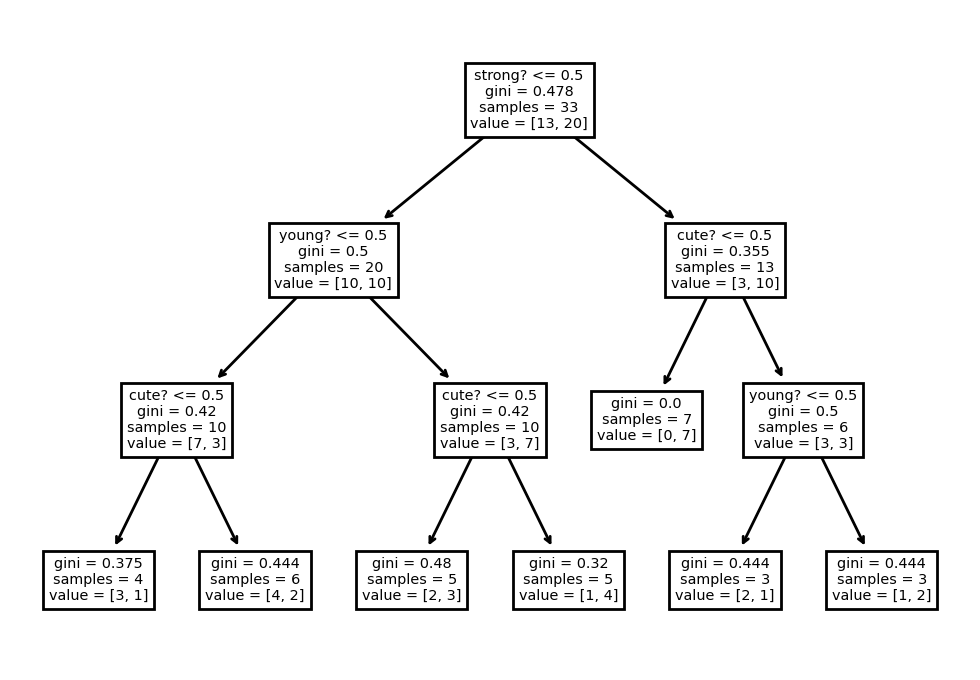

In [49]:
from sklearn import tree
data = np.array([[1,1,1,1],
                [1,1,1,1],
                [1,1,1,0],
                [1,1,0,1],
                [1,1,0,0],
                [1,1,0,0],
                [1,0,1,1],
                [1,0,1,1],
                [1,0,1,1],
                [1,0,1,1],
                [1,0,1,0],
                [1,0,0,1],
                [1,0,0,1],
                [1,0,0,0],
                [1,0,0,0],
                [1,0,0,0],
                [1,0,0,0],
                [0,1,1,1],
                [0,1,1,1],
                [0,1,0,1],
                [0,1,0,1],
                [0,1,0,1],
                [0,1,0,1],
                [0,1,0,1],
                [0,0,1,1],
                [0,0,1,1],
                [0,0,1,1],
                [0,0,1,0],
                [0,0,1,0],
                [0,0,0,1],
                [0,0,0,0],
                [0,0,0,0],
                [0,0,0,0]])
X=data[:,0:3]
Y=data[:,3]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
#tree1 = fitctree(X,Y,'CategoricalPredictors',[1, 2, 3] ...
#                 ,'PredictorNames',{'interesting','useful','fun'} ...
#                 ,'ResponseName','recommendation' ...
#                 ,'MinLeafSize',1,'MergeLeaves','off' ...
#                 ,'MinParentSize',1)

#view(tree1,'Mode','graph','PruneLevel',max(tree1.PruneList))
plt.figure(dpi=200,figsize=(5,3.5),tight_layout=1)
tree.plot_tree(clf,feature_names=['cute?','strong?','young?'])


print("Summary or probabilities for deciding on first split of data:")
print("=============================================================")
recommendation_cute=np.sum((X[:,0]==1)*(Y==1))
total_cute=np.sum(X[:,0]==1)
p_cute=recommendation_cute/total_cute
print('total cute=%d, cute&yes=%d, probability=%g\n' \
        % (total_cute,recommendation_cute,p_cute) )

recommendation_strong=sum((X[:,1]==1)*(Y==1))
total_strong=sum(X[:,1]==1)
p_strong=recommendation_strong/total_strong
print('total strong=%d, strong&yes=%d, probability=%g\n'
        % (total_strong,recommendation_strong,p_strong) )

recommendation_young=np.sum((X[:,2]==1)*(Y==1))
total_young=np.sum(X[:,2]==1)
p_young=recommendation_young/total_young
print('total young=%d, young&yes=%d, probability=%g\n'
        % (total_young,recommendation_young,p_young) )


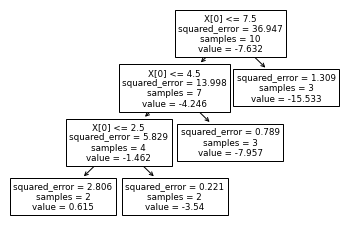

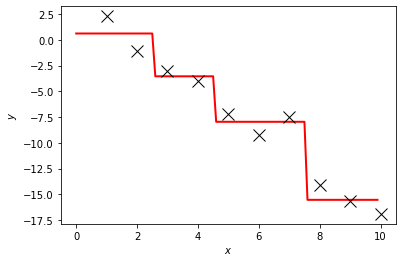

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X=np.array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
X.shape = (-1,1)
y=np.array([ 2.29, -1.06, -3.07, -4.01, -7.18, -9.2, -7.49, -14.1, -15.6, -16.9])

regressor = DecisionTreeRegressor(random_state=0,min_samples_leaf=2)
regressor.fit(X, y)

## view the tree:
tree.plot_tree(regressor)
plt.show()

Xtest=np.arange(0,10,0.1)
Xtest.shape=(-1,1)
y1=regressor.predict(Xtest)

plt.figure(1)
plt.plot(Xtest,y1,'r',linewidth=2)
plt.plot(X,y,'kx',markersize=12,linewidth=2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [63]:
Xtest

array([[0.        ],
       [0.01111111],
       [0.02222222],
       [0.03333333],
       [0.04444444],
       [0.05555556],
       [0.06666667],
       [0.07777778],
       [0.08888889],
       [0.1       ]])

N_a,N_b,N=1,9,10, variance_a,b=[0, 28.8985], variance=28.8985
N_a,N_b,N=2,8,10, variance_a,b=[2.80563, 24.2284], variance=27.034
N_a,N_b,N=3,7,10, variance_a,b=[4.88802, 20.5265], variance=25.4145
N_a,N_b,N=4,6,10, variance_a,b=[5.82927, 15.4004], variance=21.2297
N_a,N_b,N=5,5,10, variance_a,b=[9.89378, 13.4791], variance=23.3728
N_a,N_b,N=6,4,10, variance_a,b=[14.2838, 13.112], variance=27.3958
N_a,N_b,N=7,3,10, variance_a,b=[13.9975, 1.30889], variance=15.3064
N_a,N_b,N=8,2,10, variance_a,b=[22.8689, 0.4225], variance=23.2914
N_a,N_b,N=9,1,10, variance_a,b=[30.4479, 0], variance=30.4479


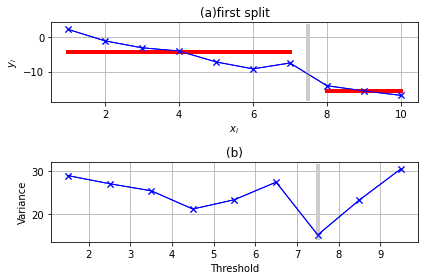

N_a,N_b,N=1,6,7, variance_a,b=[0, 8.02462], variance=8.02462
N_a,N_b,N=2,5,7, variance_a,b=[2.80563, 5.2434], variance=8.04903
N_a,N_b,N=3,4,7, variance_a,b=[4.88802, 3.51225], variance=8.40027
N_a,N_b,N=4,3,7, variance_a,b=[5.82927, 0.788956], variance=6.61822
N_a,N_b,N=5,2,7, variance_a,b=[9.89378, 0.731025], variance=10.6248
N_a,N_b,N=6,1,7, variance_a,b=[14.2838, 0], variance=14.2838


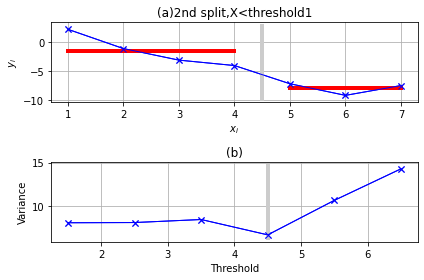

N_a,N_b,N=1,2,3, variance_a,b=[0, 0.4225], variance=0.4225
N_a,N_b,N=2,1,3, variance_a,b=[0.5625, 0], variance=0.5625


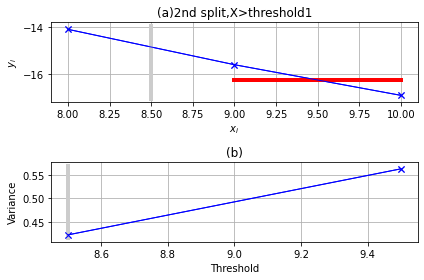

In [56]:
########################################################################
# decision_tree3_min_variance_1d_regression_manually()
########################################################################
## Constructing a 1d regression tree using the minimization of variance
## without using library routines.
## Eli, APM120, 202203

import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import matplotlib


########################################################################
def find_optimal_threshold(X,y,plot_title,ifigure):
########################################################################
    # try all thresholds, find the one that leads to minimum Variance

    N=len(X); # data assumed one dimensional
    plot_threshold=np.zeros((N-1,1))
    plot_variance=np.zeros((N-1,1))
    min_variance=10e10
    for i in range(N-1):
        threshold=(X[i]+X[i+1])/2
        variance=calc_variance(X,y,threshold)
        plot_threshold[i]=threshold
        plot_variance[i]=variance
        if variance< min_variance:
            min_variance=variance
            i_min_variance=i
            threshold_min_variance=threshold
        #print("i=%d, min_variance=%g, i_min_variance=%d, threshold_min_variance=%g" 
        #      % (i,min_variance,i_min_variance,threshold_min_variance) )

    plt.figure(ifigure);ifigure=ifigure+1
    plt.subplot(2,1,1)
    plt.plot(X,y,'bx-',linewidth=1)
    my_ylim=plt.ylim()
    plt.plot([threshold_min_variance,threshold_min_variance],my_ylim,color=[0.8,0.8,0.8],linewidth=4)
    xx=X[X<threshold_min_variance]
    yy=xx*0+np.mean(y[X<threshold_min_variance])
    plt.plot(xx,yy,color='r',linewidth=4)
    xx=X[X>threshold_min_variance]
    yy=xx*0+np.mean(y[X>threshold_min_variance])
    plt.plot(xx,yy,color='r',linewidth=4)
    plt.plot(X,y,'bx-',linewidth=1)
    plt.grid()
    plt.title('(a)'+plot_title)
    plt.xlabel("$x_i$")
    plt.ylabel("$y_i$")

    plt.subplot(2,1,2)
    plt.plot(plot_threshold,plot_variance,'bx-',linewidth=1)
    my_ylim=plt.ylim()
    plt.plot([threshold_min_variance,threshold_min_variance],my_ylim,color=[0.8,0.8,0.8],linewidth=4)
    plt.plot(plot_threshold,plot_variance,'bx-',linewidth=1)
    plt.title('(b)')
    plt.xlabel("Threshold")
    plt.ylabel("Variance")
    plt.grid()

    plt.tight_layout()
    plt.pause(0.01)
    
    return threshold_min_variance,ifigure


########################################################################
def calc_variance(X,y,threshold):
########################################################################
    ## Divide the data points in X based on threshold and calculate the 
    ## combined weighted average variance index for the two resulting sets.
    X_set_a=X[X<threshold]
    X_set_b=X[X>threshold]
    N=len(X)
    N_a=len(X_set_a)
    N_b=len(X_set_b)
    y_set_a=y[X<threshold]
    y_set_b=y[X>threshold]
    variance_a=np.var(y_set_a)
    variance_b=np.var(y_set_b)
    variance=variance_a+variance_b
    print("N_a,N_b,N=%d,%d,%d, variance_a,b=[%g, %g], variance=%g" 
          % (N_a,N_b,N,variance_a,variance_b,variance) )

    return variance


########################################################################
## Main program
########################################################################

# Create training data:
np.random.seed(2021)
N = len(X)
X=np.array([ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
X.shape = (N,)
y=np.array([ 2.29, -1.06, -3.07, -4.01, -7.18, -9.2, -7.49, -14.1, -15.6, -16.9])
ifigure=0

plot_title='first split'
threshold1,ifigure=find_optimal_threshold(X,y,plot_title,ifigure)

## now classify the points X<threshold1:
## find optimal split location for second decision:
X1a = X[X<threshold1]
y1a = y[X<threshold1]
plot_title='2nd split,X<threshold1'
threshold2a,ifigure=find_optimal_threshold(X1a,y1a,plot_title,ifigure)

## now classify the points X>threshold1:
## find optimal split location for second decision:
X1b = X[X>threshold1]
y1b = y[X>threshold1]
plot_title='2nd split,X>threshold1'
threshold2b,ifigure=find_optimal_threshold(X1b,y1b,plot_title,ifigure)




In [58]:
threshold2a

4.5